In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
iris_data = pd.read_csv("iris.data.csv")

In [4]:
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [6]:
col_names = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Species']


In [7]:
iris_data = pd.read_csv("iris.data.csv", header=None, names=col_names)
iris_data

,Sepal length,Sepal width,Petal length,Petal width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test)

In [14]:
accuracy_score(y_test, y_pred)

1.0

In [15]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [16]:
classification_report(y_test, y_pred)

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

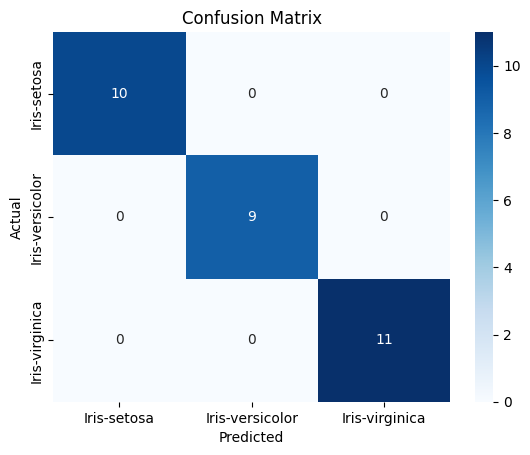

In [17]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',
            xticklabels=iris_data['Species'].unique(),
            yticklabels=iris_data['Species'].unique())
plt.title("Confusion Matrix")
plt.xlabel(
    "Predicted")
plt.ylabel("Actual")
plt.show()

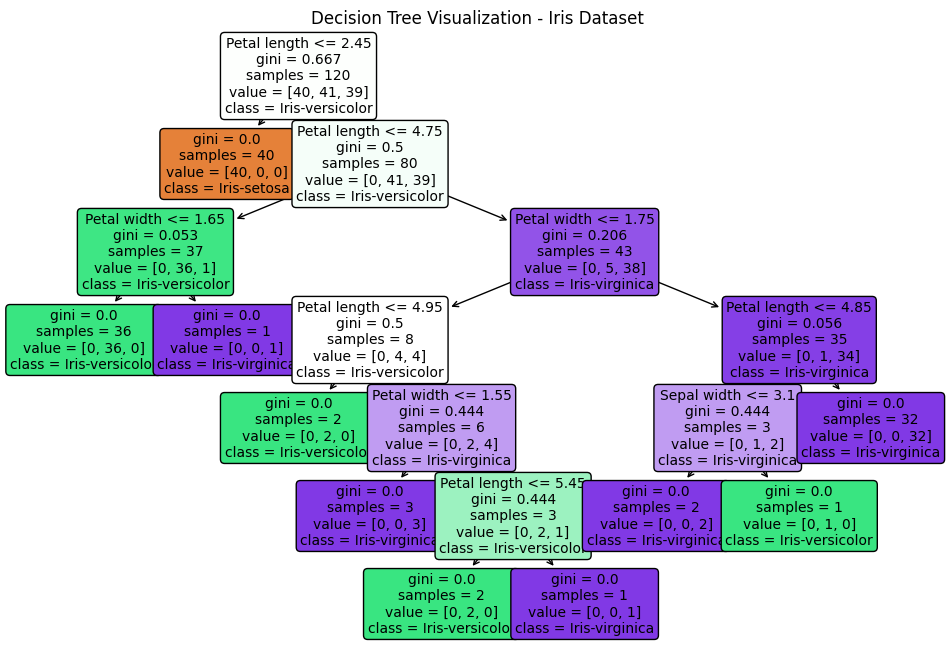

In [18]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=model.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()